In this notebook, we show an example to compute the dynamics of the system. As a representative example, we will reproduce Fig. 2 of the manuscript.

In [2]:
%load_ext autoreload
%autoreload 1
%aimport resources

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

from resources import Hamiltonian1D, Simulation

In [4]:
N = 4
n_particles = 1

tau = np.array([1, 1, 1])
U = np.array([1500, 1650, 1220, 1800])  # ueV

Vs = np.array([0, 1000, 1000 / 2, 1000 / 3])

eps_c = -10
eps = np.array([0, eps_c, eps_c, 0.])

hamiltonian = Hamiltonian1D(N=N, eps=eps, tau=tau, U=U, Vs=Vs, n_particles=n_particles, hbar=1)
simulation = Simulation(hamiltonian)

In [5]:
time = np.linspace(0, 600, 2000)

psi_0 = qt.basis(hamiltonian.D, 1)

psi_t = simulation.compute_dynamics(psi_0, time, qt_kw={'method': 'diag'})

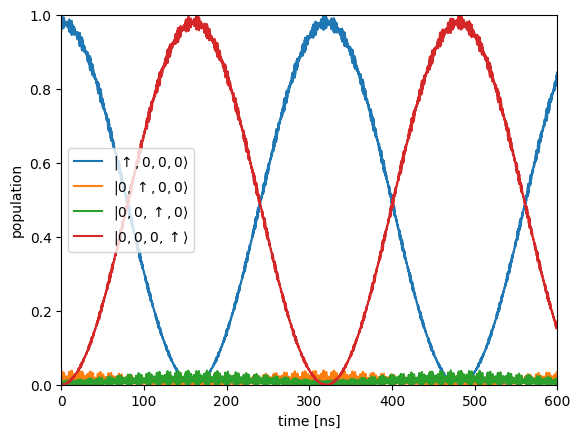

In [6]:
fig, ax = simulation.plot_dynamics(x_label='time [ns]', min_population=0.001, basis_labels=hamiltonian.basis)